In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取文件
df = pd.read_excel("/Users/zhouyijun/Desktop/作业/four_classes/GPu数据开源工具/house.xlsx")



In [3]:
# 使用Price除以Size，向下去整，得到新列unit_price，表示每平米的价格
df['unit_price'] = (df['Price'] / df['Size']).apply(lambda x: int(x))

print(df.head)

<bound method NDFrame.head of       Direction District  Floor     Garden   Price Region  Size  Year  \
0            东西      灯市口      6   锡拉胡同21号院   780.0     东城    75  1988   
1            南北       东单      6      东华门大街   705.0     东城    60  1988   
2            南西      崇文门     16      新世界中心  1400.0     东城   210  1996   
3             南      崇文门      7     兴隆都市馨园   420.0     东城    39  2004   
4             南      陶然亭     19     中海紫御公馆   998.0     东城    90  2010   
...         ...      ...    ...        ...     ...    ...   ...   ...   
23652        南北      广渠门     16       保利蔷薇  1010.0     东城    97  2008   
23653        南北      永定门      6       郭庄北里   468.0     东城    66  1995   
23654        南北      和平里      6       康鸿家园  1400.0     东城   155  2000   
23655        南北       前门      6  台基厂头条10号院  1100.0     东城   107  1990   
23656        南北      崇文门     15     新景家园东区   790.0     东城    81  2008   

       unit_price  
0              10  
1              11  
2               6  
3            

In [3]:
# 进行数据的替换
df = df.replace({'Region': {'东城': '1', '西城': '2', '朝阳': '3', '丰台': '3', '石景山': '3', '海淀': '3', '昌平': '4', '大兴': '4', '通州': '5'}})

# 定义需要保留的数据
regions_to_keep = ['1', '2', '3', '4', '5', ]

# 删除 'region' 列中未涉及的数据
df = df[df['Region'].isin(regions_to_keep)]

# 检查数据中是否存在空值
print('数据中是否存在空值：', df.isnull().values.any())

# 删除数据中全为空值的行
df.dropna(how='all', inplace=True)



数据中是否存在空值： False


In [4]:
print(df.head())

  Direction District  Floor    Garden   Price Region  Size  Year  unit_price
0        东西      灯市口      6  锡拉胡同21号院   780.0      1    75  1988          10
1        南北       东单      6     东华门大街   705.0      1    60  1988          11
2        南西      崇文门     16     新世界中心  1400.0      1   210  1996           6
3         南      崇文门      7    兴隆都市馨园   420.0      1    39  2004          10
4         南      陶然亭     19    中海紫御公馆   998.0      1    90  2010          11


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPyt

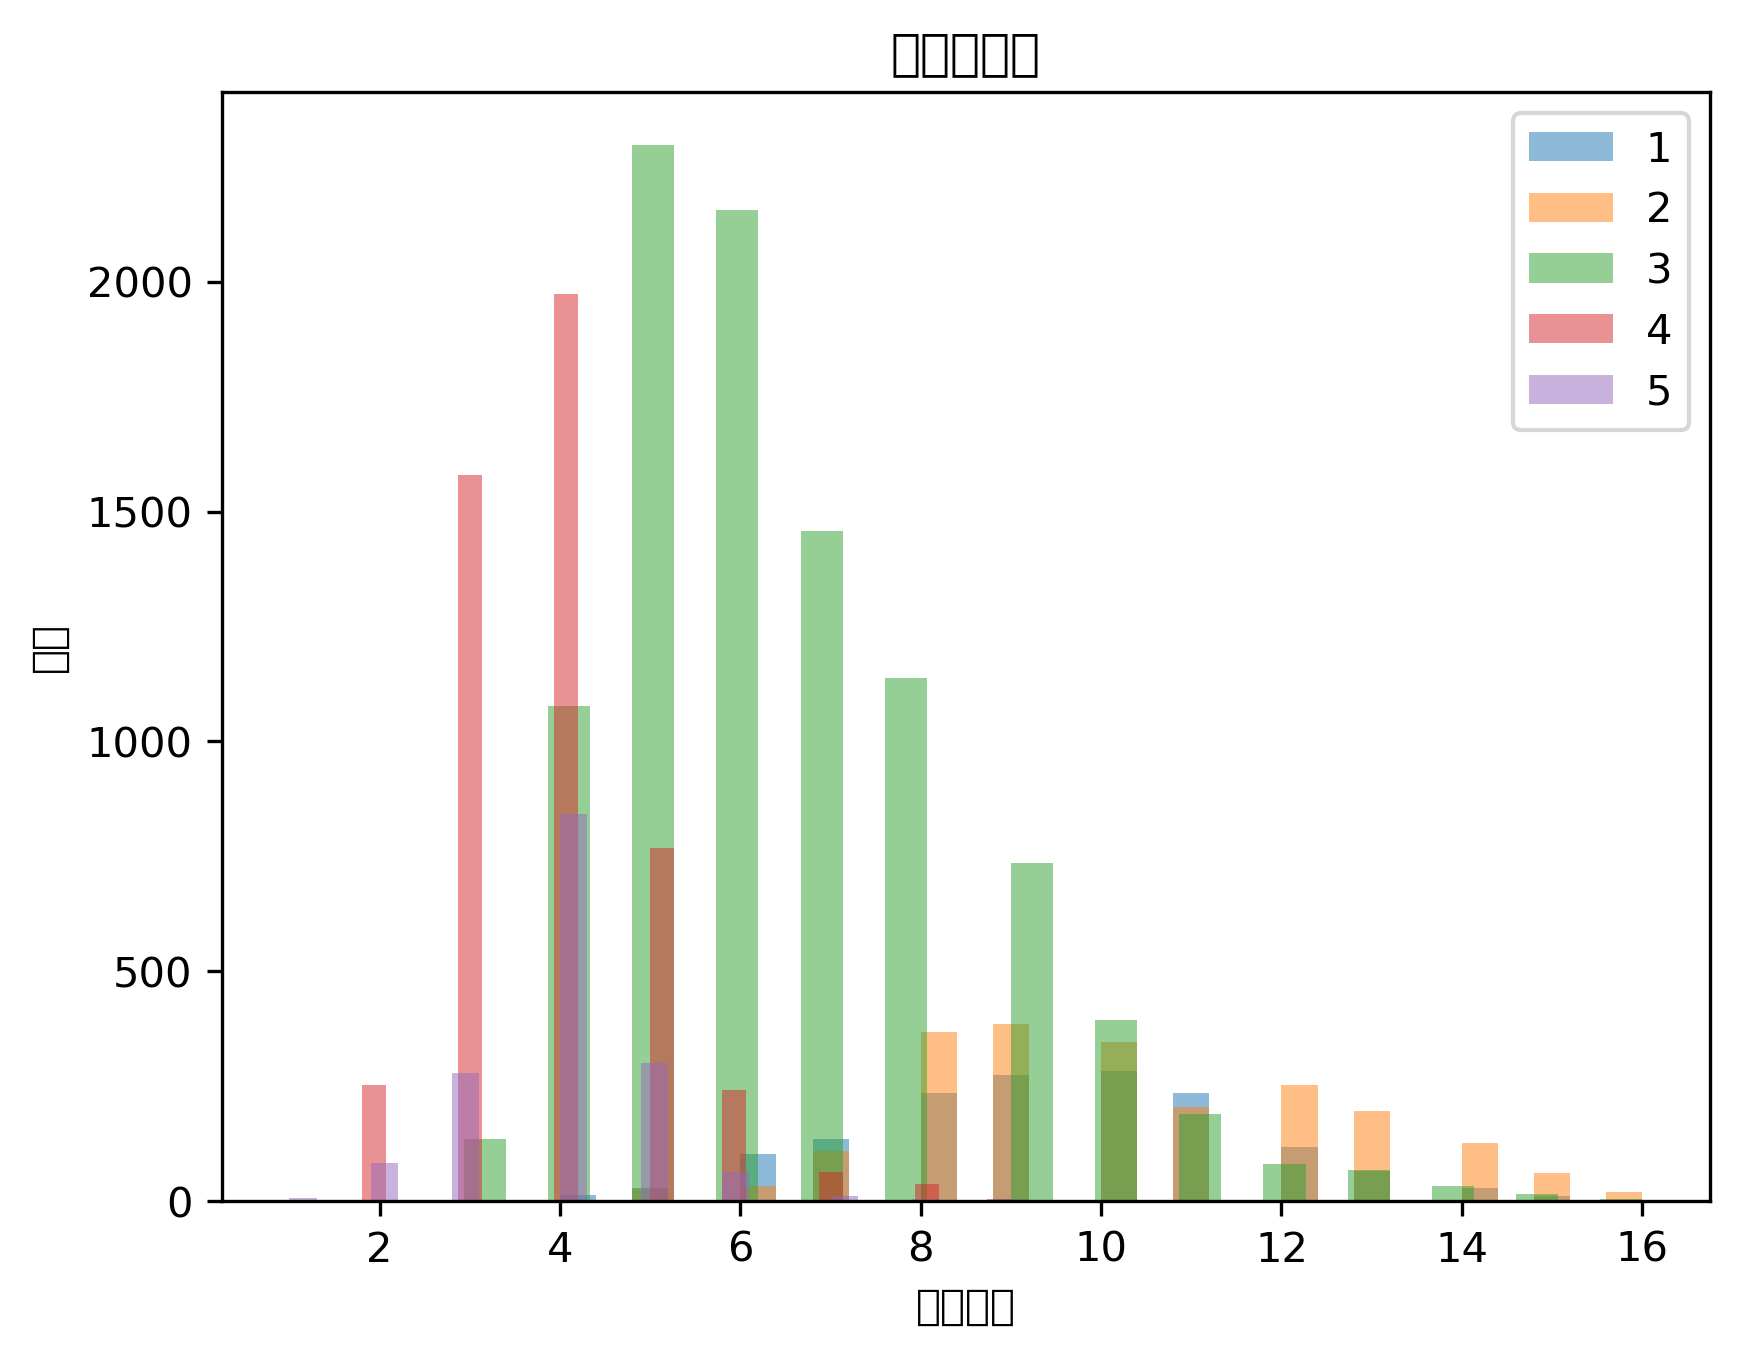

In [5]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体为WenQuanYi Zen Hei
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制直方图
regions = df['Region'].unique()
for region in regions:
    region_data = df[df['Region'] == region]
    plt.hist(region_data['unit_price'], bins=30, alpha=0.5, label=region)
plt.title('区域与房价')
plt.xlabel('平均房价')
plt.ylabel('频数')
plt.legend()

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

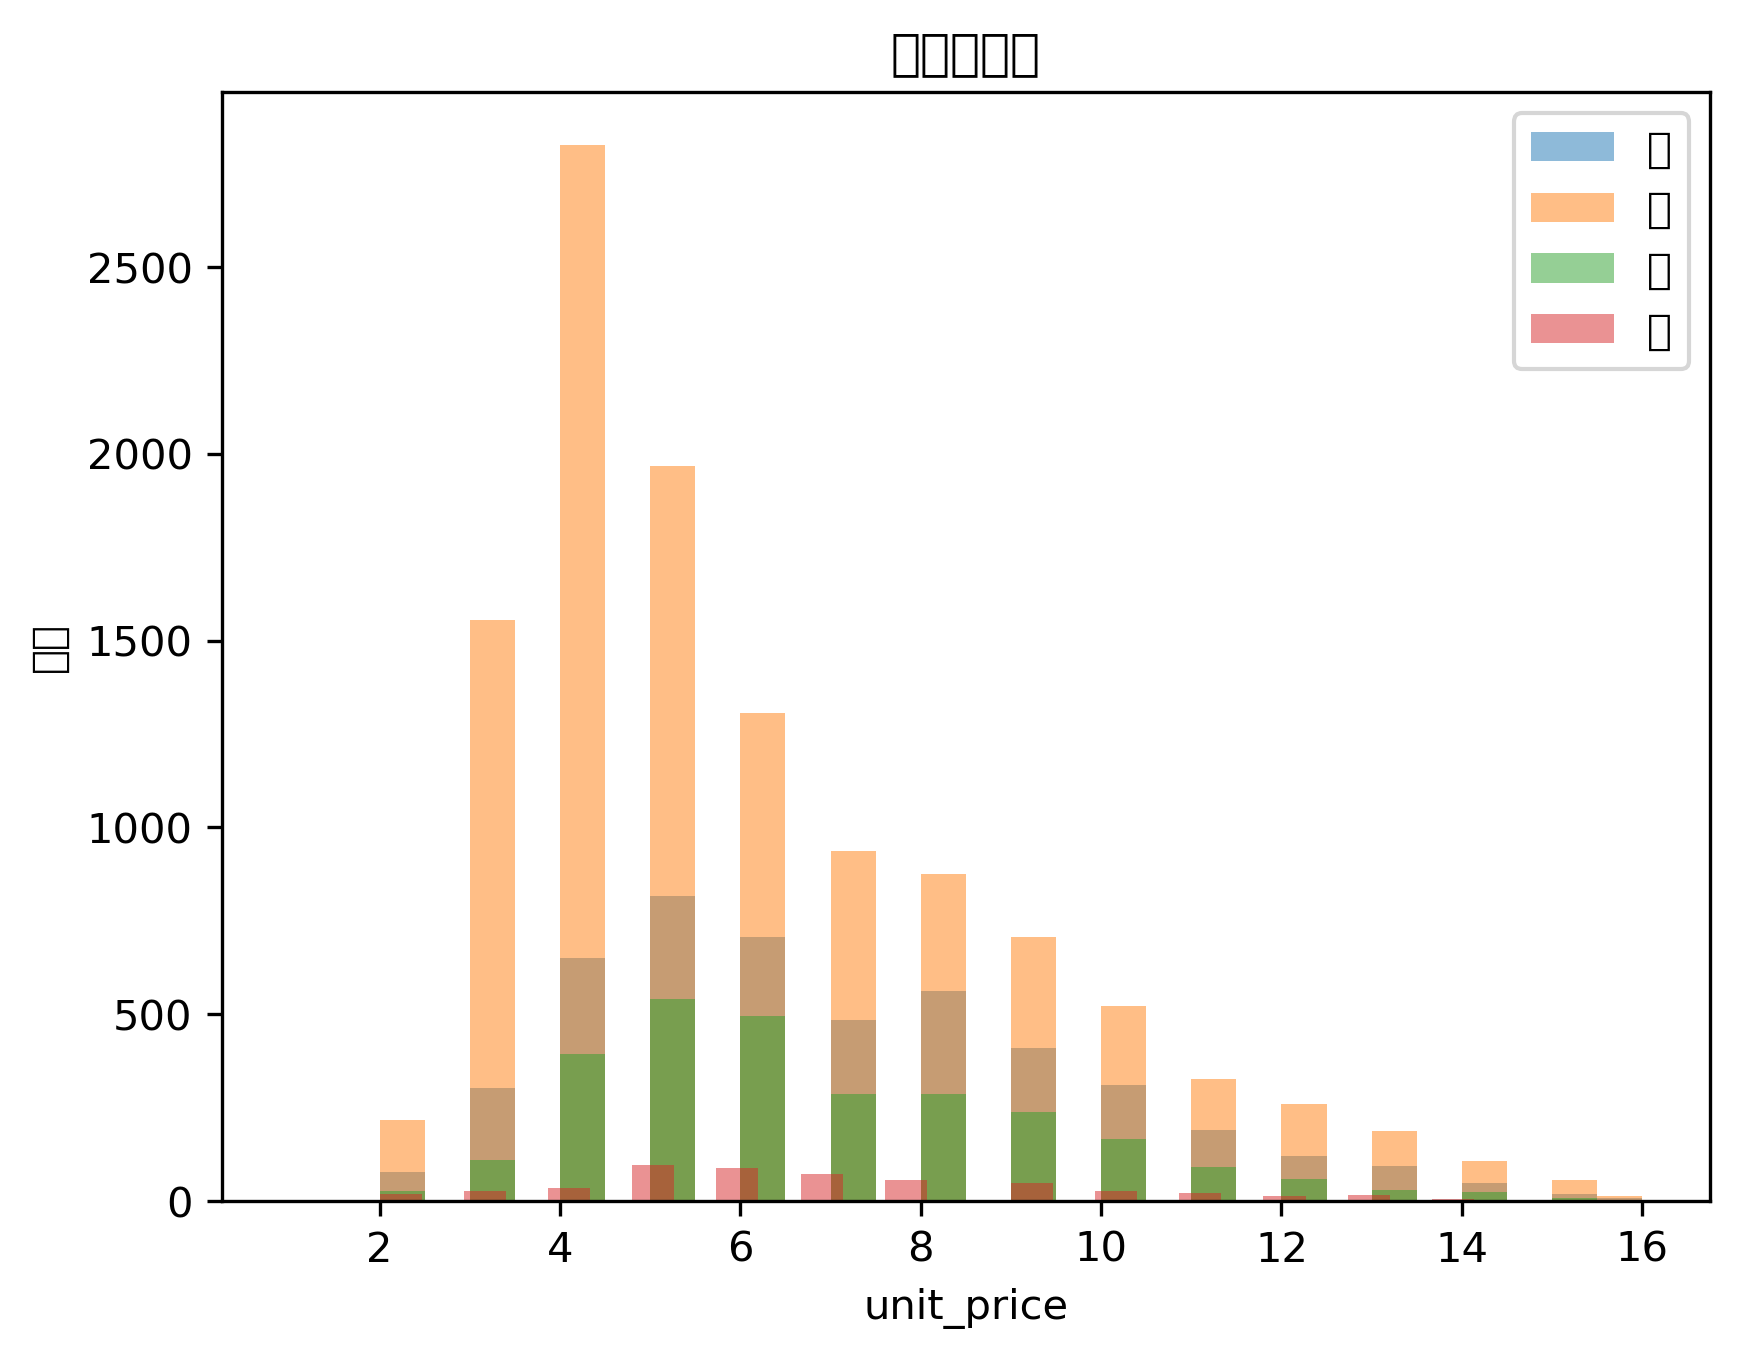

In [6]:
# 简化Direction列数据，只保留第一个字
df['Direction'] = df['Direction'].str[0]




# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体为WenQuanYi Zen Hei
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制直方图
Directions = df['Direction'].unique()
for Direction in Directions:
    Direction_data = df[df['Direction'] == Direction]
    plt.hist(Direction_data['unit_price'], bins=30, alpha=0.5, label=Direction)
plt.title('朝向与房价')
plt.xlabel('unit_price')
plt.ylabel('频数')
plt.legend()

plt.show()

In [7]:
# 对year列进行分类
df['Year'] = pd.cut(df['Year'], bins=[-float('inf'), 1958, 1977, 1998, 2017], labels = [4, 3, 2, 1])
print(df.head())


  Direction District  Floor    Garden   Price Region  Size Year  unit_price
0         东      灯市口      6  锡拉胡同21号院   780.0      1    75    2          10
1         南       东单      6     东华门大街   705.0      1    60    2          11
2         南      崇文门     16     新世界中心  1400.0      1   210    2           6
3         南      崇文门      7    兴隆都市馨园   420.0      1    39    1          10
4         南      陶然亭     19    中海紫御公馆   998.0      1    90    1          11


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/lib/python3.12/site-packages/IP

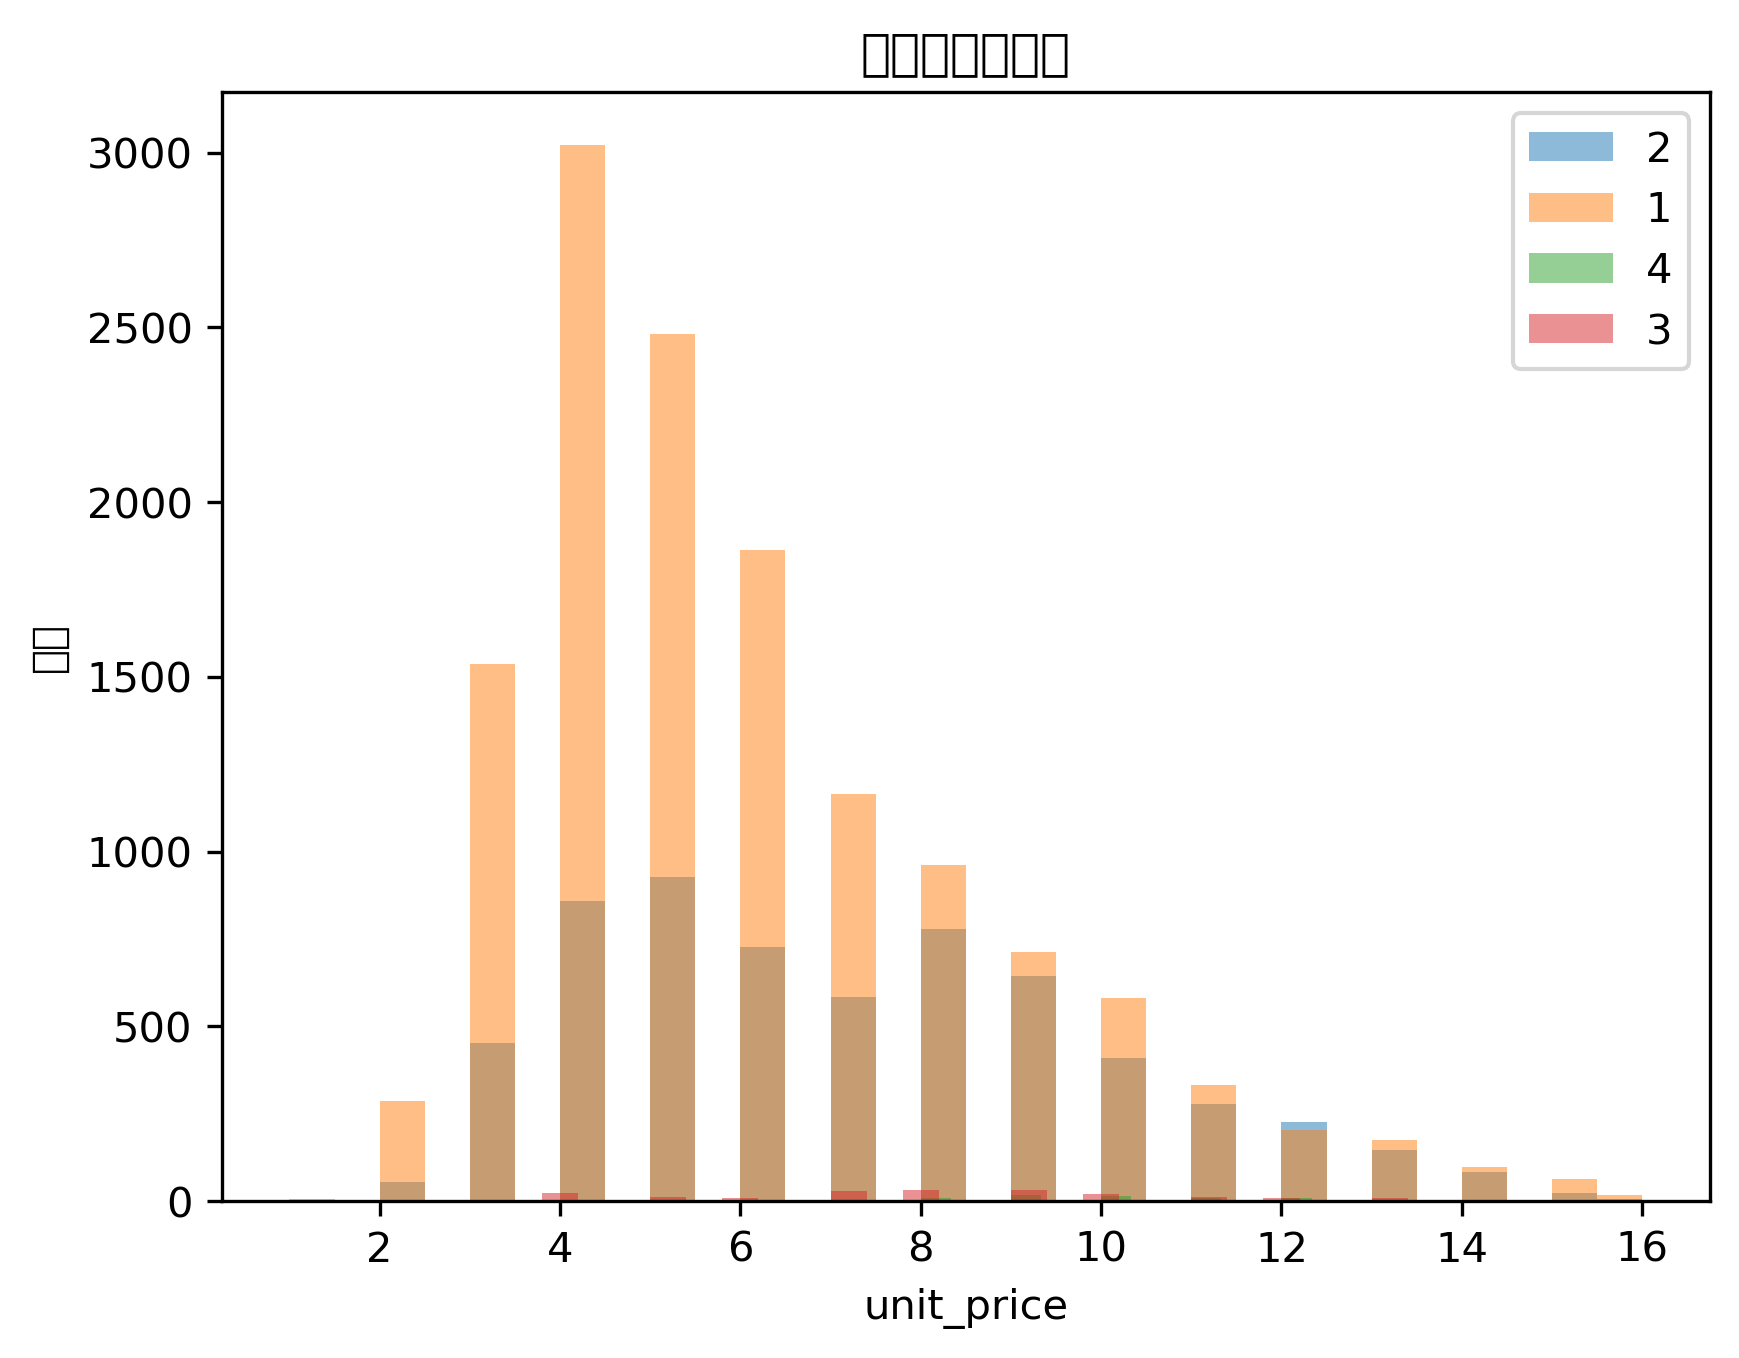

In [8]:

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体为WenQuanYi Zen Hei
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制直方图
Years = df['Year'].unique()
for Year in Years:
    Year_data = df[df['Year'] == Year]
    plt.hist(Year_data['unit_price'], bins=30, alpha=0.5, label=Year)
plt.title('建造时间与房价')
plt.xlabel('unit_price')
plt.ylabel('频数')
plt.legend()

plt.show()

In [9]:
# 对floor列进行分类
df['floor'] = pd.cut(df['Floor'], bins=[0, 8, 16, 24, float('inf')], labels=[1, 2, 3, 4])
# 删去原来的Floor列
df.drop('Floor', axis=1, inplace=True)
print(df.head())


  Direction District    Garden   Price Region  Size Year  unit_price floor
0         东      灯市口  锡拉胡同21号院   780.0      1    75    2          10     1
1         南       东单     东华门大街   705.0      1    60    2          11     1
2         南      崇文门     新世界中心  1400.0      1   210    2           6     2
3         南      崇文门    兴隆都市馨园   420.0      1    39    1          10     1
4         南      陶然亭    中海紫御公馆   998.0      1    90    1          11     3


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

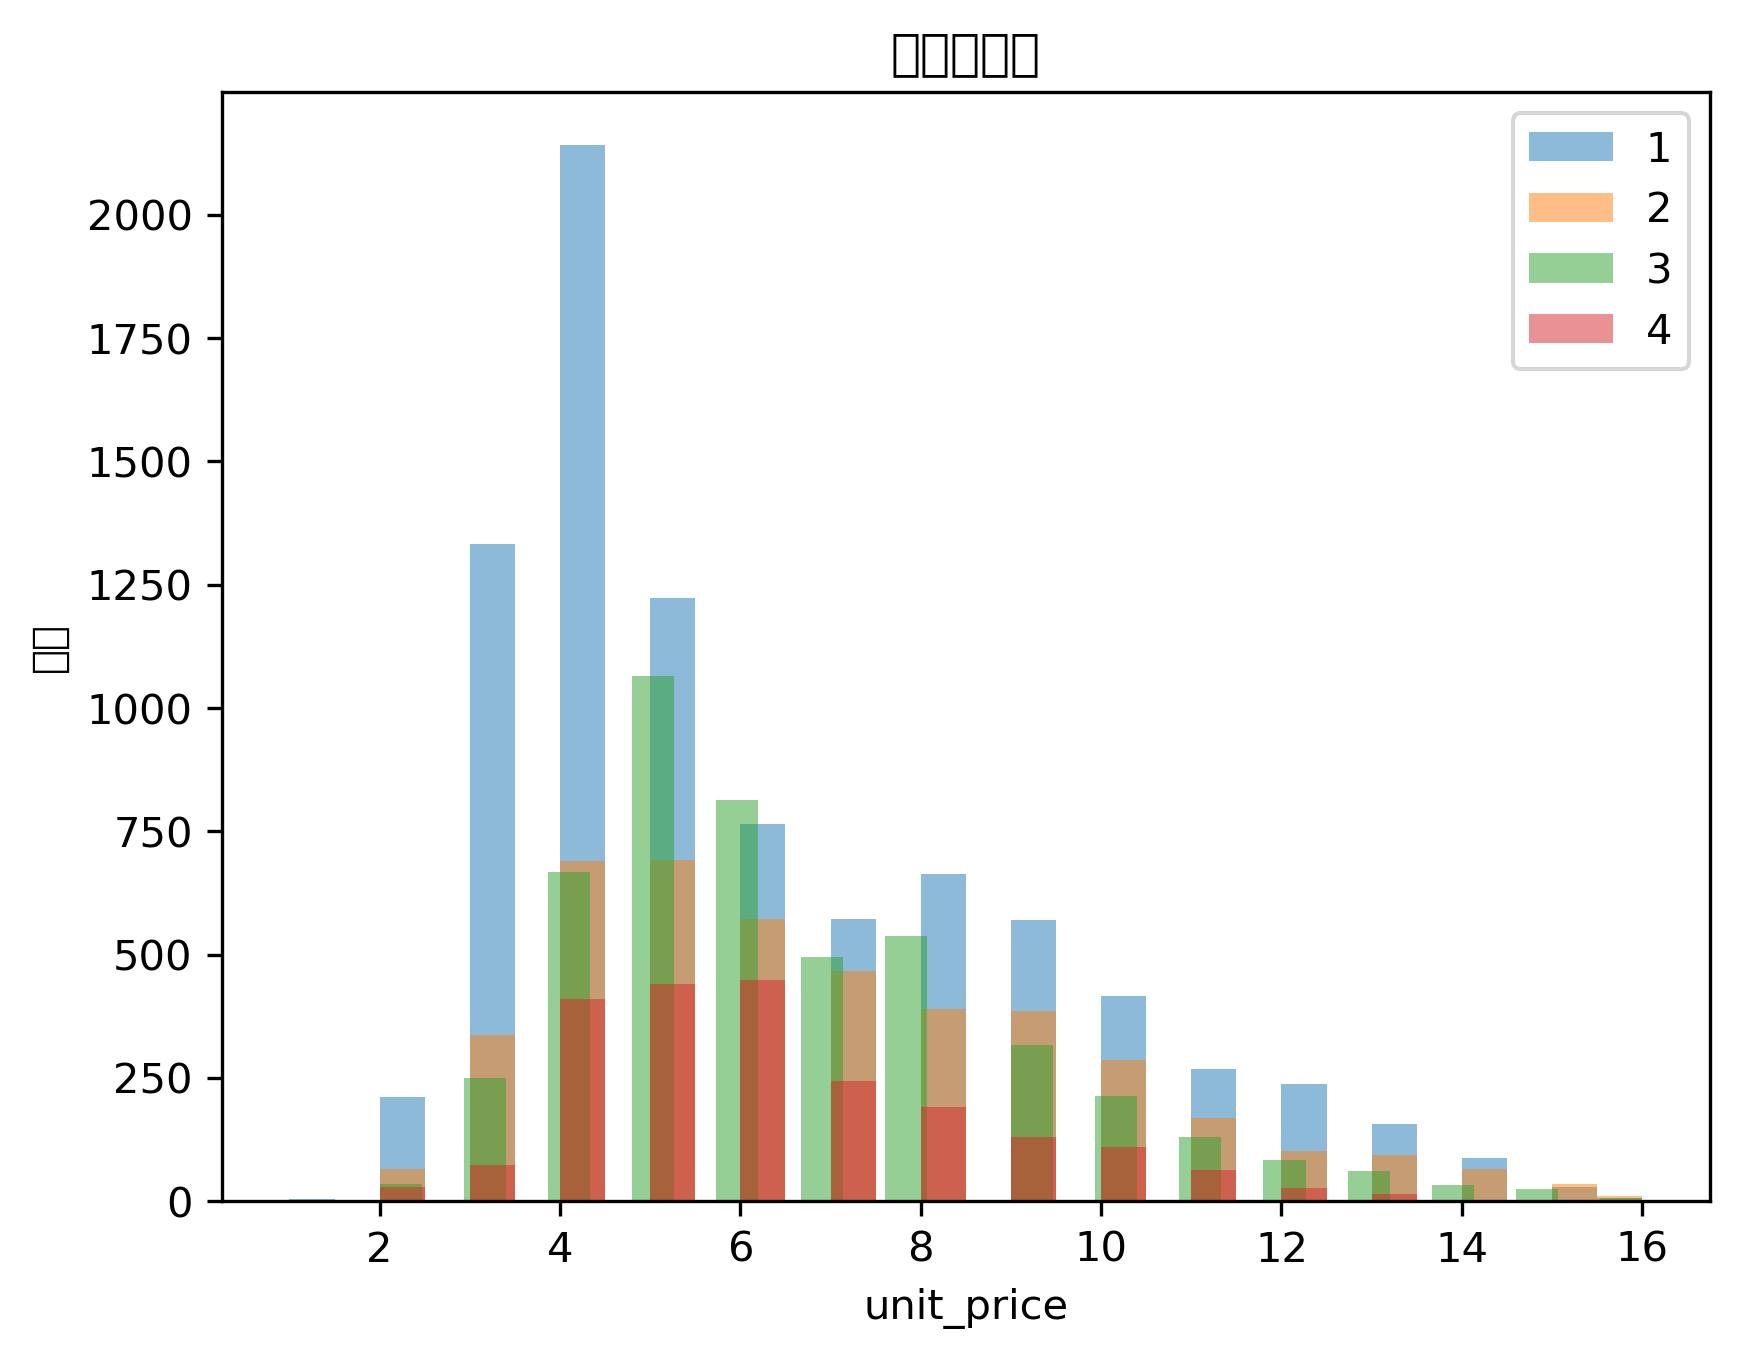

In [10]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体为WenQuanYi Zen Hei
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制直方图
floors = df['floor'].unique()
for floor in floors:
    floor_data = df[df['floor'] == floor]
    plt.hist(floor_data['unit_price'], bins=30, alpha=0.5, label=floor)
plt.title('楼层与房价')
plt.xlabel('unit_price')
plt.ylabel('频数')
plt.legend()

plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 提取相关列的数据
data = df[['floor', 'Region', 'Year', 'unit_price']]

# 独热编码分类变量
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# 划分特征和目标变量
x = data.drop(['unit_price'], axis=1)
y = data['unit_price']

# 数据标准化
scaler = StandardScaler()
x = scaler.fit_transform(X)

# 拆分数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# 创建线性回归模型并进行训练
model = LinearRegression()
model.fit(x_train, y_train)

# 预测测试集结果
y_pred = model.predict(x_test)

# 输出模型的系数和截距
print('模型的系数：\n', model.coef_)
print('模型的截距：', model.intercept_)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('均方误差 (MSE):', mse)
print('R^2:', r2)


KeyError: "['floor'] not in index"

In [ ]:
from sklearn.metrics import mean_squared_error

# 计算预测的均方误差
mse = mean_squared_error(y_test, y_pred)

print('预测的均方误差：', mse)

In [ ]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 计算预测的均方误差
mse = mean_squared_error(y_test, y_pred)

# 计算决定系数（R-squared）
r2 = r2_score(y_test, y_pred)

# 添加常数项
X = sm.add_constant(X)

# 创建线性回归模型并进行训练
model = sm.OLS(y, X).fit()

# 输出评估指标
print('预测的均方误差：', mse)
print('模型的决定系数（R-squared）：', r2)

# 对模型进行残差分析
print('模型的残差分析信息：')
print(model.summary())